In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

In [57]:
## question 1

order_item_df = pd.read_csv("order_item.csv")
items_df = pd.read_csv("items.csv")
customers_df = pd.read_csv("customers.csv")
orders_df = pd.read_csv("orders.csv")

def display_table_info(df, table_name):
    print(f"Table: {table_name}")
    print(f"Columns: {df.columns.tolist()}")
    print(f"Data Types: {df.dtypes.tolist()}")
    non_null_counts = df.notnull().sum()
    print(f"Non-null counts per column: {non_null_counts}")
    print(f"Total rows: {len(df)}")
    print(f"Columns with missing values: {df.isnull().sum()}")

display_table_info(customers_df, "Customers")
display_table_info(items_df, "Items")
display_table_info(order_item_df, "Order Item")
display_table_info(orders_df, "Orders")

Table: Customers
Columns: ['id', 'first_name', 'last_name', 'gender', 'age', 'nationallity', 'joining_date', 'phone_number', 'email']
Data Types: [dtype('int64'), dtype('O'), dtype('O'), dtype('O'), dtype('float64'), dtype('O'), dtype('O'), dtype('O'), dtype('O')]
Non-null counts per column: id              500
first_name      494
last_name       494
gender          447
age             475
nationallity    494
joining_date    439
phone_number    500
email           500
dtype: int64
Total rows: 500
Columns with missing values: id               0
first_name       6
last_name        6
gender          53
age             25
nationallity     6
joining_date    61
phone_number     0
email            0
dtype: int64
Table: Items
Columns: ['id', 'item_name', 'item_category', 'item_price', 'stock_quantity', 'item_brand', 'item_availability']
Data Types: [dtype('int64'), dtype('O'), dtype('O'), dtype('float64'), dtype('float64'), dtype('O'), dtype('bool')]
Non-null counts per column: id             

In [13]:
def display_table_summary(df, table_name):
    print(f"Table: {table_name}")
    print(f"Columns: {df.columns.tolist()}")
    summary = df.describe(include='all')  
    print(f"Summary Statistics:{summary}")

display_table_summary(customers_df, "Customers")
display_table_summary(items_df, "Items")
display_table_summary(order_item_df, "Order Item")
display_table_summary(orders_df, "Orders")

Table: Customers
Columns: ['id', 'first_name', 'last_name', 'gender', 'age', 'nationallity', 'joining_date', 'phone_number', 'email']
Summary Statistics:                id first_name  last_name  gender         age   nationallity  \
count   500.000000        494        494     447  475.000000            494   
unique         NaN        484        491       8         NaN             15   
top            NaN    Massimo  Clitheroe  Female         NaN  United States   
freq           NaN          2          2     203         NaN             98   
mean    250.500000        NaN        NaN     NaN   44.006316            NaN   
std     144.481833        NaN        NaN     NaN   14.813395            NaN   
min       1.000000        NaN        NaN     NaN    2.000000            NaN   
25%     125.750000        NaN        NaN     NaN   34.000000            NaN   
50%     250.500000        NaN        NaN     NaN   44.000000            NaN   
75%     375.250000        NaN        NaN     NaN   55.000

In [27]:
def display_first_5_rows(df, table_name):
    print(f"Table: {table_name}")
    print(df.head())

display_first_5_rows(customers_df, "Customers")
display_first_5_rows(items_df, "Items")
display_first_5_rows(order_item_df, "Order Item")
display_first_5_rows(orders_df, "Orders")

Table: Customers
   id first_name  last_name  gender   age nationallity joining_date  \
0   1      Eadie     Maffeo  Female  41.0       France   11/01/2022   
1   2     Hammad  Brewerton    Male  56.0       Isreal   30/09/2022   
2   3    Terrell       Bris    Male  43.0        India          NaN   
3   4    Frannie   Morewood    Male  84.0       France   26/05/2021   
4   5      Sophi      Fleet  Female  33.0       Sweden   19/07/2021   

   phone_number                      email  
0  534-341-9052        emaffeo0@smh.com.au  
1  999-994-0510  hbrewerton1@discovery.com  
2  980-455-5208            tbris2@yale.edu  
3  979-187-1493  fmorewood3@vistaprint.com  
4  991-853-9984         sfleet4@unicef.org  
Table: Items
   id           item_name                item_category  item_price  \
0  26       Action Camera        Photography Equipment     2694.25   
1  37  Antivirus Software                     Software     4186.62   
2  11      Blu-Ray Player  Video Players and Recorders     3382

In [53]:
items_df['non_null_count'] = items_df.notnull().sum(axis=1)

sorted_items_df = items_df.sort_values(by=['item_name', 'non_null_count'], ascending=[True, False])

unique_items_df = sorted_items_df.drop_duplicates(subset=['item_name'], keep='first')

print(items_df.head())

   id           item_name                item_category  item_price  \
0  26       Action Camera        Photography Equipment     2694.25   
1  37  Antivirus Software                     Software     4186.62   
2  11      Blu-Ray Player  Video Players and Recorders     3382.86   
3  25           Camcorder        Photography Equipment      860.01   
4   7              Camera        Photography Equipment     2366.72   

   stock_quantity item_brand  item_availability  non_null_count  
0             NaN       Bose              False               7  
1             NaN        NaN              False               6  
2           704.0       ASUS               True               8  
3           870.0       Bose               True               8  
4           458.0  Microsoft               True               8  


In [51]:
most_non_null_item_id = items_df.sort_values(by='non_null_count', ascending=False).iloc[0]['id']
order_item_df['item_id'] = order_item_df['item_id'].apply(lambda x: most_non_null_item_id if order_item_df['item_id'].tolist().count(x) > 1 else x)

print(order_item_df.head())

   id  order_id  item_id  quantity
0   1       337     20.0         2
1   2       430     20.0         6
2   3       430     20.0         2
3   4       508     20.0         1
4   5       229     20.0         2


In [59]:
missing_data_count = customers_df.isnull().sum(axis=1)
customers_to_remove = customers_df[missing_data_count >= 3].index
filtered_customers_df = customers_df.drop(customers_to_remove)

orders_to_remove = filtered_customers_df['id'].tolist()
filtered_order_item_df = order_item_df[~order_item_df['order_id'].isin(orders_to_remove)]
print(order_item_df.head())
print(customers_df.head())

   id  order_id  item_id  quantity
0   1       337     10.0         2
1   2       430     27.0         6
2   3       430     36.0         2
3   4       508     46.0         1
4   5       229     27.0         2
   id first_name  last_name  gender   age nationallity joining_date  \
0   1      Eadie     Maffeo  Female  41.0       France   11/01/2022   
1   2     Hammad  Brewerton    Male  56.0       Isreal   30/09/2022   
2   3    Terrell       Bris    Male  43.0        India          NaN   
3   4    Frannie   Morewood    Male  84.0       France   26/05/2021   
4   5      Sophi      Fleet  Female  33.0       Sweden   19/07/2021   

   phone_number                      email  
0  534-341-9052        emaffeo0@smh.com.au  
1  999-994-0510  hbrewerton1@discovery.com  
2  980-455-5208            tbris2@yale.edu  
3  979-187-1493  fmorewood3@vistaprint.com  
4  991-853-9984         sfleet4@unicef.org  


In [75]:
## continue question 2

order_item_with_price = order_item_df.merge(items_df[['id', 'item_price']], left_on='item_id', right_on='id', how='left')
order_item_with_price['total_price'] = order_item_with_price['item_price'] * order_item_with_price['quantity']

print(order_item_with_price.head())

   id_x  order_id  item_id  quantity  id_y  item_price  total_price
0     1       337     10.0         2  10.0      453.85       907.70
1     2       430     27.0         6  27.0     1283.99      7703.94
2     3       430     36.0         2  36.0     3256.88      6513.76
3     4       508     46.0         1  46.0     1606.65      1606.65
4     5       229     27.0         2  27.0     1283.99      2567.98


In [77]:
purchase_total_df = order_item_with_price.groupby('order_id')['total_price'].sum().reset_index()
print(purchase_total_df.head())

   order_id  total_price
0         1      8554.20
1         2     10148.58
2         3      6843.36
3         4       965.20
4         5     63944.94


In [79]:

max_purchase = purchase_total_df['total_price'].max()
min_purchase = purchase_total_df['total_price'].min()
avg_purchase = purchase_total_df['total_price'].mean()


max_purchase_order_id = purchase_total_df[purchase_total_df['total_price'] == max_purchase]['order_id'].iloc[0]
min_purchase_order_id = purchase_total_df[purchase_total_df['total_price'] == min_purchase]['order_id'].iloc[0]


print(f"Most Expensive Purchase: Order ID {max_purchase_order_id} with total price of {max_purchase}")
print(f"Cheapest Purchase: Order ID {min_purchase_order_id} with total price of {min_purchase}")
print(f"Average Purchase Price: {avg_purchase}")

Most Expensive Purchase: Order ID 484 with total price of 81267.68
Cheapest Purchase: Order ID 289 with total price of 0.0
Average Purchase Price: 14580.417133182846


In [81]:
pivot_table_customers = customers_df.pivot_table(index='nationallity', columns='gender', aggfunc='size', fill_value=0)
print(pivot_table_customers)

gender         Agender  Bigender  Female  Genderfluid  Genderqueer  Male  \
nationallity                                                               
Argentina            1         0      10            1            0     9   
Brazil               0         0       6            0            0    17   
Chile                1         0      14            0            0     9   
China                0         0       5            1            1     9   
France               1         0      15            1            0    10   
Germany              0         0      12            0            0     3   
India                1         0       8            0            0    15   
Isreal               2         1      20            5            1    31   
Italy                0         0      15            0            2    11   
Japan                2         0      12            0            0     8   
Peru                 1         0      12            1            0     6   
South Korea 

In [83]:
customer_count_pivot = customers_df.pivot_table(index='nationallity', columns='gender', aggfunc='size', fill_value=0)
print(customer_count_pivot)

gender         Agender  Bigender  Female  Genderfluid  Genderqueer  Male  \
nationallity                                                               
Argentina            1         0      10            1            0     9   
Brazil               0         0       6            0            0    17   
Chile                1         0      14            0            0     9   
China                0         0       5            1            1     9   
France               1         0      15            1            0    10   
Germany              0         0      12            0            0     3   
India                1         0       8            0            0    15   
Isreal               2         1      20            5            1    31   
Italy                0         0      15            0            2    11   
Japan                2         0      12            0            0     8   
Peru                 1         0      12            1            0     6   
South Korea 

<Axes: xlabel='age', ylabel='Count'>

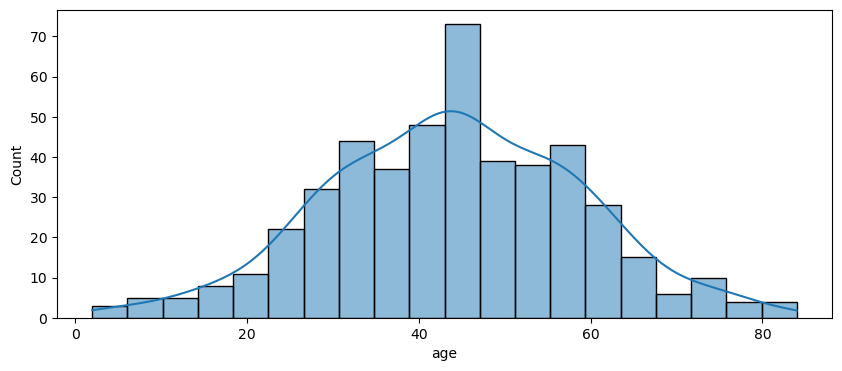

In [89]:
df = pd.read_csv("customers.csv")
plt.figure(figsize=(10, 4))

sns.histplot(data=df, x='age',bins=20, kde=True)

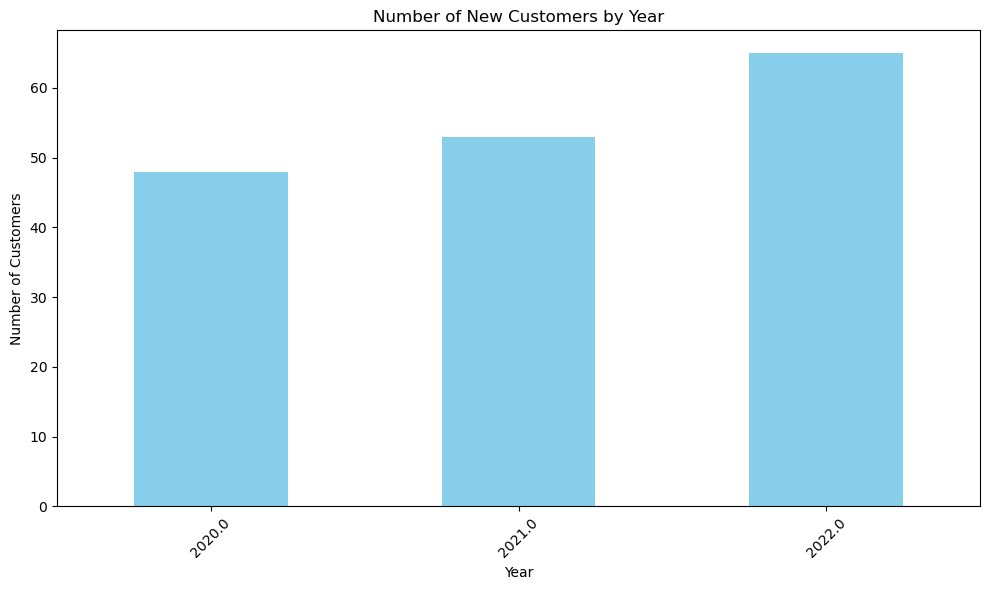

In [111]:
df = pd.read_csv("customers.csv")

customers_df['joining_date'] = pd.to_datetime(customers_df['joining_date'], errors='coerce')

customers_df['joining_year'] = customers_df['joining_date'].dt.year

customers_per_year = customers_df['joining_year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
customers_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of New Customers by Year')
plt.xlabel('Year')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

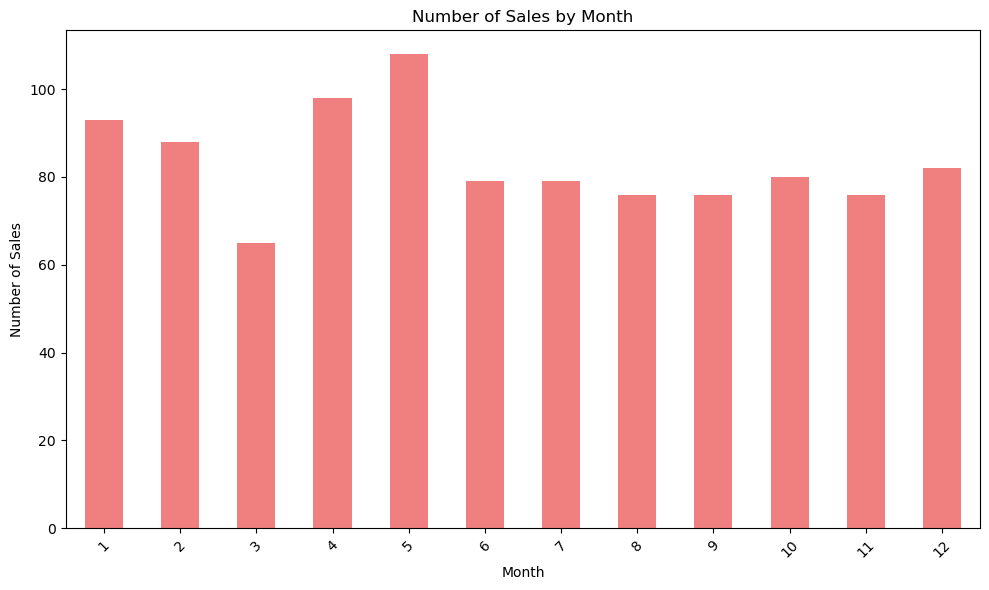

In [121]:
order_item_with_date['order_month_only'] = order_item_with_date['order_month'].dt.month

sales_per_month_without_year = order_item_with_date['order_month_only'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sales_per_month_without_year.plot(kind='bar', color='lightcoral')
plt.title('Number of Sales by Month')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

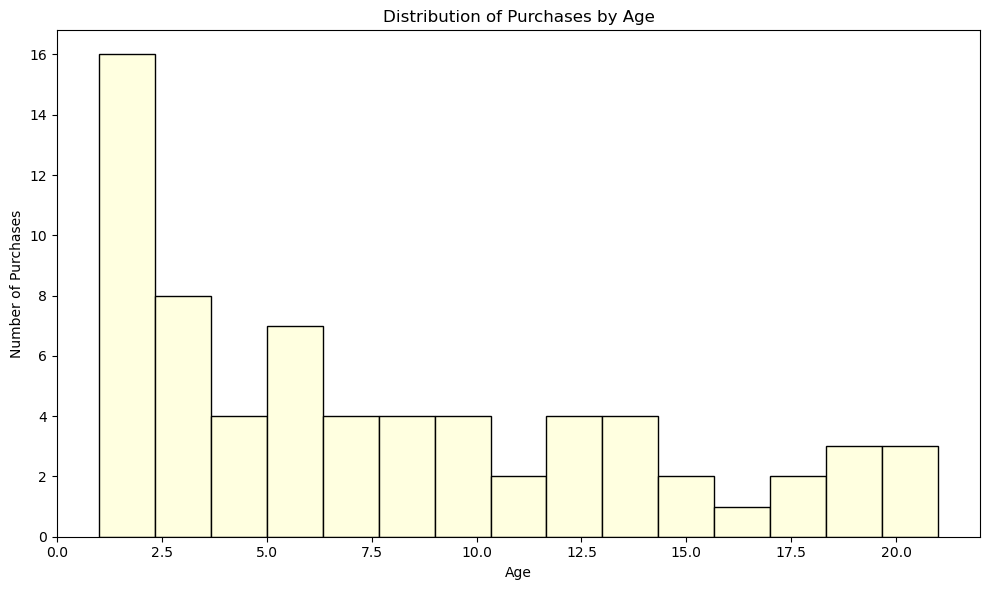

In [133]:
orders_with_age = orders_df.merge(customers_df[['id', 'age']], left_on='customer_id', right_on='id', how='left')

purchases_per_customer = orders_with_age.groupby('age').size()

plt.figure(figsize=(10, 6))
purchases_per_customer.plot(kind='hist', bins=15, color='lightyellow', edgecolor='black')
plt.title('Distribution of Purchases by Age')
plt.xlabel('Age')
plt.ylabel('Number of Purchases')
plt.tight_layout()
plt.show()